In [20]:
#grid, spines, axels camo, ticks not rotate, no y axel, padding, storytelling with data, white background,  (sandra progressionen)

# Uppgift 0 - uppvärmning med riket

 a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena.

 - Bra start på uppdraget, lärde mig mest om hur mycket OneDrive kan förstöra för din filepath, speciellt om du jobbar mellan två datorer.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_engelska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Engelska", skiprows=7)
df_matematik = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Matematik", skiprows=7
)
df_svenska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Svenska", skiprows=7)
df_svenska2 = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Svenska som andraspråk", skiprows=7
)
df_rapport = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Rapportbeskrivning och def."
)

df_matematik

,Unnamed: 0,Unnamed: 1,Antal elever med provbetyg A-F,Unnamed: 3,Unnamed: 4,Andel (%) med provbetyg A-E,Unnamed: 6,Unnamed: 7,Genomsnittlig betygspoäng,Unnamed: 9,Unnamed: 10
0,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
1,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12
2,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
3,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13,12.8,13.1
4,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


 b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

Lärde mig om hur man rensa data och får ut rätt information ur exempelvis ett excel kalkylblad och rätt sheet. 

Startar med att skriva ut så att se att datan är rätt märk väl jokern på Skolverket ~100 och NaN, vilket blev en utmaning att skriva ut eftersom dessa inte är siffror.

Utskrift avrundat till heltal.

Utksrift av df_matematik för att visa hur datanvisualiseringen har ändrats.

In [34]:
import pandas as pd

df_matematik = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Matematik", skiprows=8
)

df_matematik = df_matematik.iloc[:, 1:-3]

df_matematik.columns = [
    "Huvudman",
    "Totalt A-F",
    "Flickor A-F",
    "Pojkar A-F",
    "Totalt i % A-E",
    "Flickor i % A-E",
    "Pojkar i % A-E",
]

df_matematik["Flickor A-F"] = pd.to_numeric(df_matematik["Flickor A-F"], errors="coerce")
df_matematik["Pojkar A-F"] = pd.to_numeric(df_matematik["Pojkar A-F"], errors="coerce")
df_matematik["Flickor i % A-E"] = pd.to_numeric(df_matematik["Flickor i % A-E"], errors="coerce")
df_matematik["Pojkar i % A-E"] = pd.to_numeric(df_matematik["Pojkar i % A-E"], errors="coerce")

girls_f = int(
    round(
        df_matematik.loc[0, "Flickor A-F"]
        - df_matematik.loc[0, "Flickor A-F"]
        * (df_matematik.loc[0, "Flickor i % A-E"] / 100),
        0,
    )
)

boys_f = int(
    round(
        df_matematik.loc[0, "Pojkar A-F"]
        - df_matematik.loc[0, "Pojkar A-F"] * (df_matematik.loc[0, "Pojkar i % A-E"] / 100),
        0,
    )
)

print("Antal flickor med betyg F för samtliga:", girls_f)
print("Antal pojkar med betyg F för samtliga:", boys_f)

df_matematik


Antal flickor med betyg F för samtliga: 5825
Antal pojkar med betyg F för samtliga: 5798


,Huvudman,Totalt A-F,Flickor A-F,Pojkar A-F,Totalt i % A-E,Flickor i % A-E,Pojkar i % A-E
0,Samtliga,106766,51548,55218,89.1,88.7,89.5
1,Kommunal,84163,40386,43777,88.1,87.7,88.5
2,Enskild,22553,11137,11416,92.9,92.2,93.5
3,Skolverket,50,25,25,~100,NaN,NaN


---

  c) Rita ett stapeldiagram på totala poängen för de olika ämnena.

  Ändrar ej datavisualiseringen för att visa hur utvecklingen har gått inom denna uppgift, utskrift i matplot format.

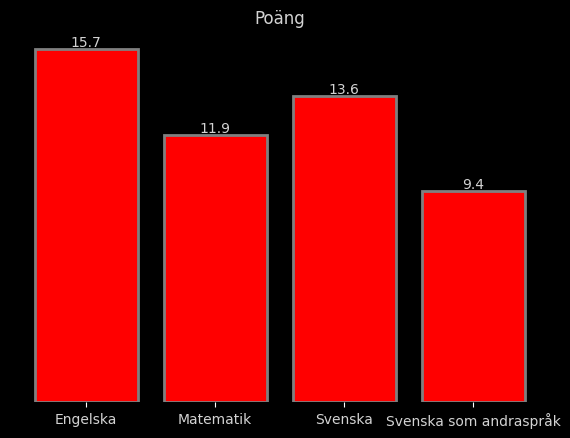

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

file_path = "riket2023_åk9_np.xlsx"

subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
sheets = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

totalt = {}

for sheet, subject in zip(sheets, subjects):
    df = pd.read_excel(file_path, sheet_name=sheet, skiprows=8)
    total_average_points = df.iloc[0, -3]
    totalt[subject] = total_average_points

bars = plt.bar(totalt.keys(), totalt.values(), color="red", edgecolor="gray", linewidth=2)

plt.grid(False)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

plt.gca().patch.set_alpha(0.0)

plt.xticks(rotation=0, color="lightgray")

plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout(pad=3)


plt.title("Poäng", color="lightgray")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, round(height, 1),
             ha="center", va="bottom", color="lightgray")

plt.show()


---

 d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

 Denna del fastnade jag lite längre på, fick ett flertal errors, många lärdomar och mycket slå huvudet i väggen tills det börjar fungera igen, den största lärdomen jag tagit är hur viktigt det är att datan är rätt! Jag hade tex försökt få in A-F Pojkar ett flertal gånger pga dålig namnsättning och även många problem uppstog pga att jag fortfarande var så oerfaren inom detta ämne, och tack vare många inputs ifrån Kokchung så har jag börjat få en bättre ide för vad som är bra datavisualisering och icke (jämför tidigare uppgift med denna).

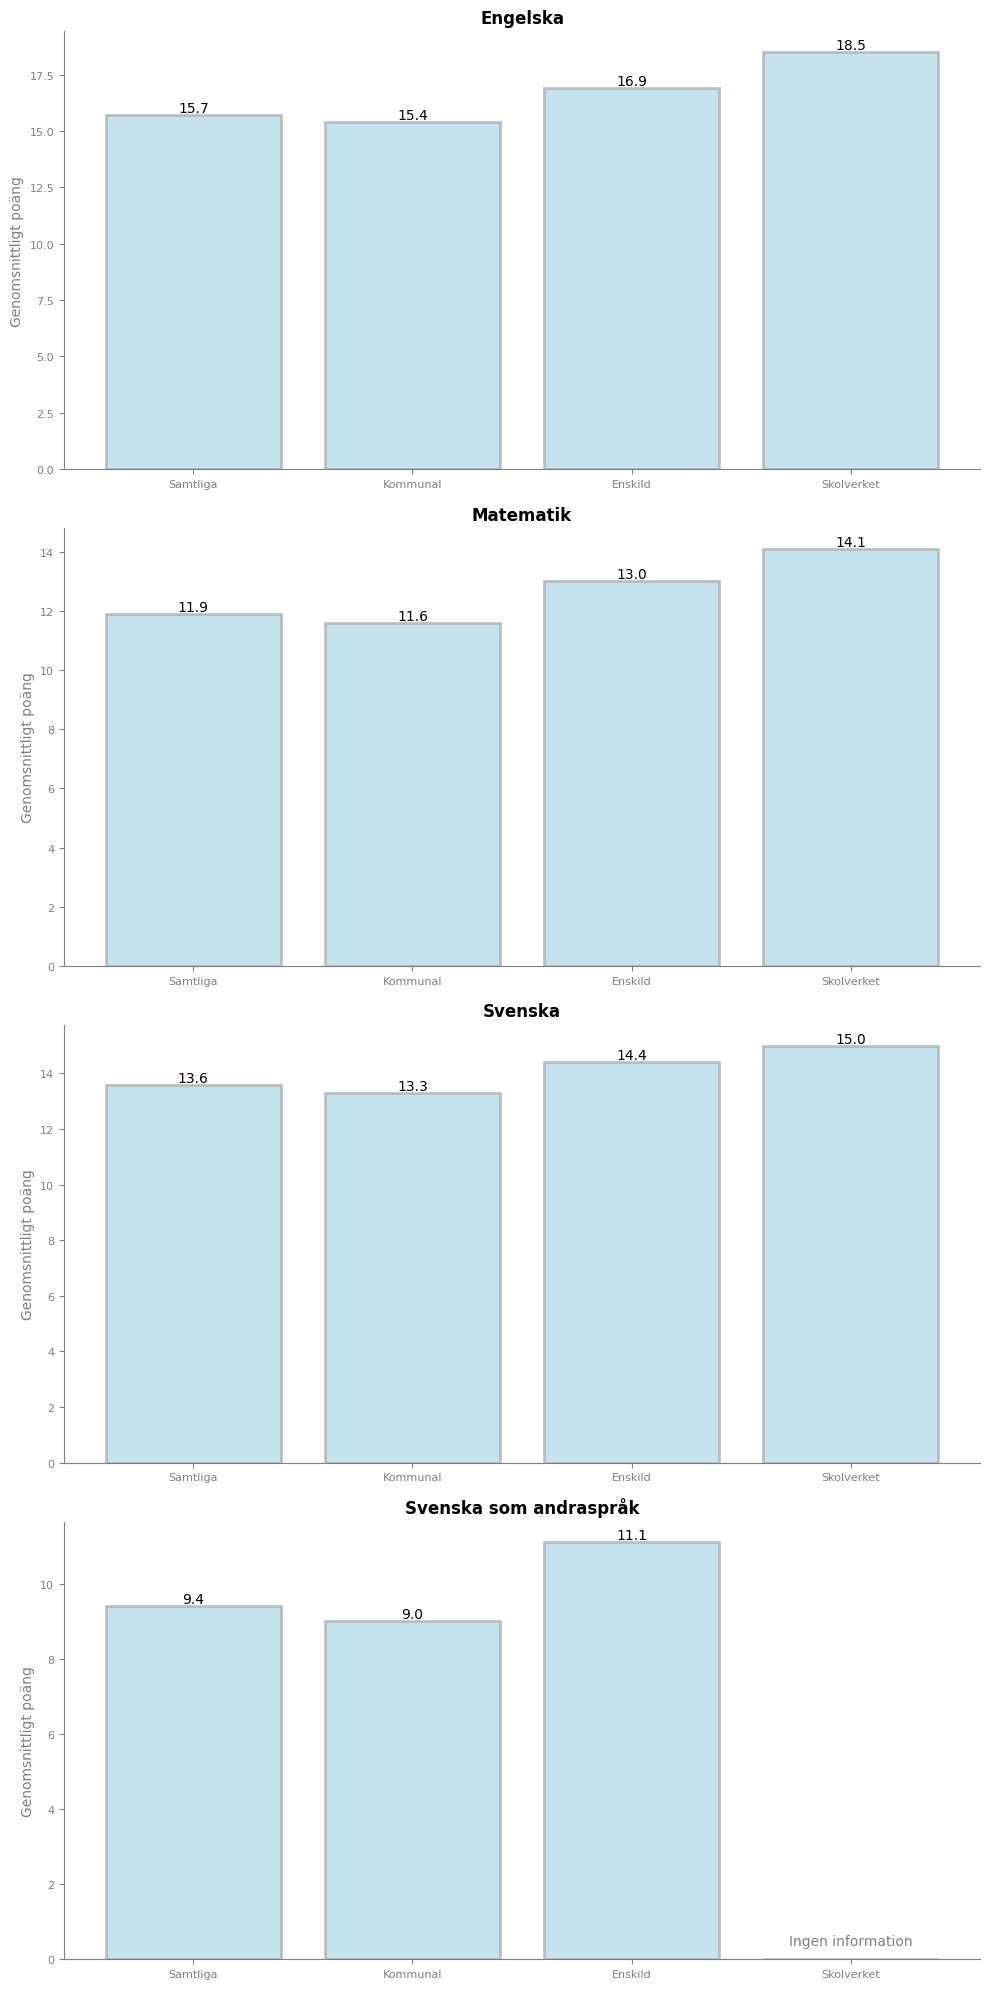

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("future.no_silent_downcasting", True)

file_path = "riket2023_åk9_np.xlsx"
dfs = pd.read_excel(file_path, sheet_name=None, skiprows=8)

new_column_names = [
    "Riket",
    "Typ av huvudman",
    "A-F Totalt", "A-F Flickor", "A-F Pojkar",
    "% Totalt", "% Flickor", "% Pojkar",
    "Genomsnittligt Totalt", "Genomsnittligt Flickor", "Genomsnittligt Pojkar"
]

for df in dfs.values():
    new_column_names_adjusted = [col.strip() for col in new_column_names[:len(df.columns)]]
    df.columns = new_column_names_adjusted

num_plots = len(dfs) - 1
subjects = list(dfs.keys())
subjects.remove("Rapportbeskrivning och def.")

fig, axs = plt.subplots(num_plots, 1, figsize=(10, 5*num_plots))
fig.patch.set_facecolor("white")  # Set background color of the figure

for i, (sheet, df) in enumerate(dfs.items()):
    if sheet == "Rapportbeskrivning och def.":
        continue
    ax = axs[i] if num_plots > 1 else axs
    ax.set_title(sheet, color="black", fontweight="bold")
    
    typ_av_huvudman = df["Typ av huvudman"]
    
    df.replace("..", 0, inplace=True)
    
    totalt = pd.to_numeric(df["Genomsnittligt Totalt"], errors="coerce")
    
    bars = ax.bar(typ_av_huvudman, totalt, color="lightblue", edgecolor="darkgray", linewidth=2, alpha=0.7)  
    
    for bar, value in zip(bars, totalt):
        if value == 0:
            ax.text(bar.get_x() + bar.get_width()/2., 0.5, "Ingen information", ha="center", va="center", color="gray")  
        else:
            ax.text(bar.get_x() + bar.get_width()/2., value, str(value), ha="center", va="bottom", color="black")  
    
    if "Skolverket" not in typ_av_huvudman.values:
        ax.text(len(typ_av_huvudman), 0.5, "Ingen information", ha="center", va="center", color="gray")  
    
    ax.set_ylabel("Genomsnittligt poäng", color="gray")  
    ax.set_facecolor("white")  
    ax.spines["top"].set_color("gray")  
    ax.spines["bottom"].set_color("gray")  
    ax.spines["left"].set_color("gray")  
    ax.spines["right"].set_color("gray")  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.xaxis.set_ticks_position("bottom")  
    
    labels = ax.get_xticklabels()
    for label in labels:
        if label.get_text() in ["Kommunal", "Statlig"]:
            label.set_rotation(0)
        label.set_color("gray")  

    ax.tick_params(axis="both", colors="gray", labelsize=8)  
plt.tight_layout()
plt.show()


---

a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.


Jag är nog snart inne på en fjärde revision av denna uppgift, jag hade lite svårt att tolka denna uppgift ifrån början, jag startade tex med att göra en matplot version som får stå kvar för att kunna jämföra med den utveckligen jag har gjort, jag misstolkade även "andel" som "totala" vilket inte är rätt alls (se plotly version för rätt beräkning och bättre datavisualisering).

In [35]:
# Kolumns kvar för att kunna visualisera data bättre

import pandas as pd

df_1a = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")
df_1b = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

data_1a = df_1a.iloc[9:14]
data_1b = df_1b.iloc[7:12]

a_columns = [
    "Läsår",
    "Avslut åk 9 Totalt",
    "Flickor avslut",
    "Pojkar avslut",
    "Elever med slutbetyg totalt",
    "Flickor slutbetyg",
    "Pojkar slutbetyg",
    "Godkända slutbetyg totalt",
    "Flickor godkända",
    "Pojkar godkända",
]

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen totalt",
    "Medelvärde 16 ämne flickor",
    "Medelvärde 16 ämnen pojkar",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar",
    "% Som saknar godkänt",
    "P Flickor",
    "P Pojkar",
]

data_1a.columns = a_columns
data_1b.columns = b_columns

display(data_1a)
display(data_1b)

,Läsår,Avslut åk 9 Totalt,Flickor avslut,Pojkar avslut,Elever med slutbetyg totalt,Flickor slutbetyg,Pojkar slutbetyg,Godkända slutbetyg totalt,Flickor godkända,Pojkar godkända
9,2018/19,112731,54667,58064,112280,54430,57850,110663,53757,56906
10,2019/20,115023,55670,59353,114444,55389,59055,112728,54711,58017
11,2020/21,116359,56715,59644,115710,56394,59316,114136,55721,58415
12,2021/22,120525,58513,62012,119891,58207,61684,117935,57312,60623
13,2022/23,121369,59043,62326,120742,58703,62039,118736,57781,60955


,Läsår,Medelvärde 16 ämnen totalt,Medelvärde 16 ämne flickor,Medelvärde 16 ämnen pojkar,Medelvärde 17 ämnen totalt,Medelvärde 17 flickor,Medelvärde 17 pojkar,% Som saknar godkänt,P Flickor,P Pojkar
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
8,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
9,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
10,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
11,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28


---
## OBS MATPLOT VERSION

Matplot version kvar i utbildnings syfte och se utveckling.

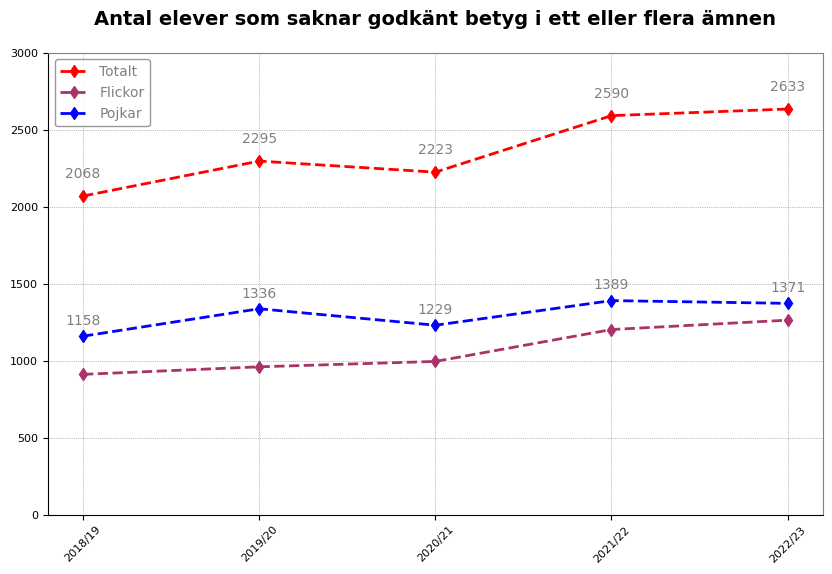

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df_1a = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")

data_1a = df_1a.iloc[9:14].copy()

a_columns = [
    "Läsår",
    "Avslut åk 9 Totalt",
    "Flickor avslut",
    "Pojkar avslut",
    "Elever med slutbetyg totalt",
    "Flickor slutbetyg",
    "Pojkar slutbetyg",
    "Godkända slutbetyg totalt",
    "Flickor godkända",
    "Pojkar godkända",
]

data_1a.columns = a_columns

data_1a["Elever saknar godkänt betyg, totalt"] = (
    data_1a["Avslut åk 9 Totalt"] - data_1a["Godkända slutbetyg totalt"]
)
data_1a["Elever saknar godkänt betyg, flickor"] = (
    data_1a["Flickor avslut"] - data_1a["Flickor godkända"]
)
data_1a["Elever saknar godkänt betyg, pojkar"] = (
    data_1a["Pojkar avslut"] - data_1a["Pojkar godkända"]
)

plt.figure(figsize=(10, 6))
plt.plot(data_1a["Läsår"], data_1a["Elever saknar godkänt betyg, totalt"], marker="d", label="Totalt", color="red", linewidth=2, linestyle="--")
plt.plot(data_1a["Läsår"], data_1a["Elever saknar godkänt betyg, flickor"], marker="d", label="Flickor", color="#AA336A", linewidth=2, linestyle="--")
plt.plot(data_1a["Läsår"], data_1a["Elever saknar godkänt betyg, pojkar"], marker="d", label="Pojkar", color="blue", linewidth=2, linestyle="--")

for i, txt in enumerate(data_1a["Elever saknar godkänt betyg, totalt"]):
    plt.text(data_1a["Läsår"].iloc[i], data_1a["Elever saknar godkänt betyg, totalt"].iloc[i] + 100, txt, ha="center", va="bottom", color="gray")

for i, txt in enumerate(data_1a["Elever saknar godkänt betyg, pojkar"]):
    plt.text(data_1a["Läsår"].iloc[i], data_1a["Elever saknar godkänt betyg, pojkar"].iloc[i] + 55, txt, ha="center", va="bottom", color="gray")

plt.title("Antal elever som saknar godkänt betyg i ett eller flera ämnen", color="black", fontsize=14, fontweight="bold", pad=20)
plt.xticks(data_1a["Läsår"], rotation=45, color="black", fontsize=10)
plt.yticks(color="black", fontsize=10)

# Set tick parameters
plt.gca().tick_params(axis="both", colors="black", labelsize=8)

plt.legend(facecolor="white", edgecolor="black", fontsize=10, loc="upper left")
legend = plt.gca().get_legend()
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_edgecolor("gray")
for text in legend.get_texts():
    text.set_color("gray")

plt.ylim(0, 3000)  

plt.gca().set_facecolor("white")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["top"].set_color("gray")
plt.gca().spines["left"].set_color("black")
plt.gca().spines["right"].set_color("gray")
plt.gcf().set_facecolor("white")

plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')  

plt.show()


---
## OBS PLOTLY VERSION

Var mycket roligare att jobba med plotly, saker jag har lärt mig är bla 

In [27]:
import pandas as pd
import plotly.graph_objects as go

df_1b = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")
data_1b = df_1b.iloc[7:12].copy()

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen totalt",
    "Medelvärde 16 ämne flickor",
    "Medelvärde 16 ämnen pojkar",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar",
    "% Som saknar godkänt",
    "% Flickor",
    "% Pojkar",
]

data_1b.columns = b_columns

fig = go.Figure()

fig.add_trace(go.Scatter(x=data_1b["Läsår"], y=data_1b["% Som saknar godkänt"], mode="lines+markers", name="% Tillsammans", line=dict(color="blue", dash="dash"), marker=dict(symbol="diamond", size=10), text=[f"{p}%" for p in data_1b["% Som saknar godkänt"]]))
fig.add_trace(go.Scatter(x=data_1b["Läsår"], y=data_1b["% Flickor"], mode="lines+markers", name="% Flickor", line=dict(color="deeppink", dash="dash"), marker=dict(symbol="diamond", size=10), text=[f"{p}%" for p in data_1b["% Flickor"]]))
fig.add_trace(go.Scatter(x=data_1b["Läsår"], y=data_1b["% Pojkar"], mode="lines+markers", name="% Pojkar", line=dict(color="black", dash="dash"), marker=dict(symbol="diamond", size=10), text=[f"{p}%" for p in data_1b["% Pojkar"]]))

for i, row in data_1b.iterrows():
    fig.add_annotation(
        x=row["Läsår"],
        y=row["% Som saknar godkänt"],
        text=f"{row['% Som saknar godkänt']}%",
        showarrow=False,
        font=dict(color="black", size=10),
        xshift=5,
        yshift=20,
    )

for i, row in data_1b.iterrows():
    fig.add_annotation(
        x=row["Läsår"],
        y=row["% Flickor"],
        text=f"{row['% Flickor']}%",
        showarrow=False,
        font=dict(color="black", size=10),
        xshift=5,
        yshift=20,
    )

for i, row in data_1b.iterrows():
    fig.add_annotation(
        x=row["Läsår"],
        y=row["% Pojkar"],
        text=f"{row['% Pojkar']}%",
        showarrow=False,
        font=dict(color="black", size=10),
        xshift=5,
        yshift=20,
    )

fig.update_layout(
    title=dict(
        text="<b>Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen</b>",
        font=dict(color="black")
    ),
    xaxis=dict(showgrid=True, showline=True, linewidth=1, linecolor="black", tickmode="linear", tick0=0, dtick=1, gridcolor="lightgray", gridwidth=1, griddash='dot'),
    yaxis=dict(showgrid=True, showline=True, linewidth=1, linecolor="black", range=[20, 29], dtick=2, tickwidth=1, tickcolor="black", gridcolor="lightgray", gridwidth=1, griddash='dot'),
    legend=dict(font=dict(color="black"), bgcolor="white", bordercolor="black", borderwidth=1),
    plot_bgcolor="white",
    paper_bgcolor="white",
    margin=dict(l=50, r=50, t=80, b=80), 
    width=1200,  
    hoverlabel=dict(
        font=dict(color='black'),
        bgcolor='white'
    )
)

fig.show()


---
b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

# OBS MATPLOT VERSION

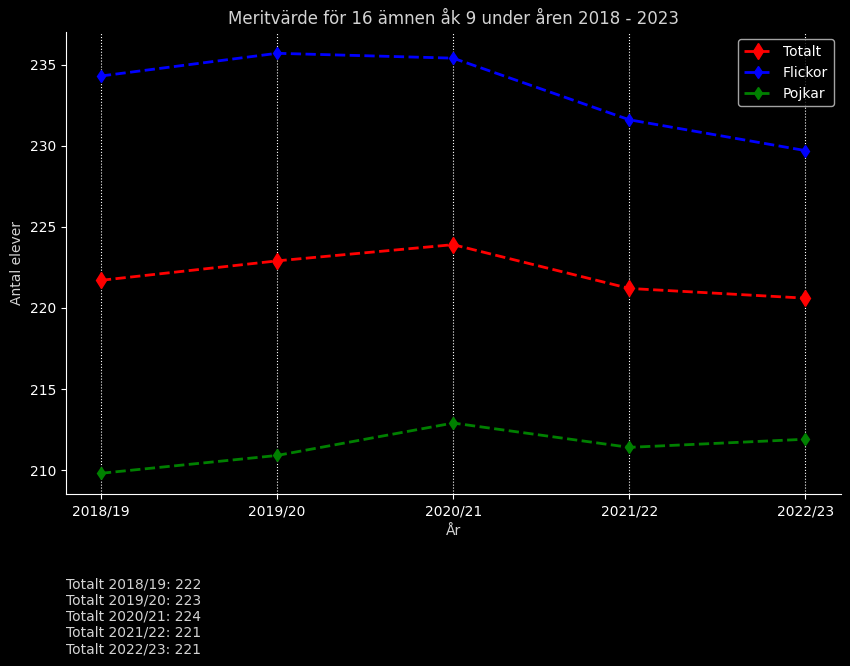

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df_1b = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

data_1b = df_1b.iloc[7:13].copy()

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen totalt",
    "Medelvärde 16 ämnen flickor",
    "Medelvärde 16 ämnen pojkar",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar",
    "% Som saknar godkänt",
    "P Flickor",
    "P Pojkar",
]

data_1b.columns = b_columns

data_1b.dropna(inplace=True)

years = data_1b["Läsår"]
Mean_T = data_1b["Medelvärde 16 ämnen totalt"]
Mean_F = data_1b["Medelvärde 16 ämnen flickor"]
Mean_P = data_1b["Medelvärde 16 ämnen pojkar"]

plt.figure(figsize=(10, 6))

plt.plot(years, Mean_T, label="Totalt", marker="d", ms=8, ls="--", color='red', linewidth=2)
plt.plot(years, Mean_F, label="Flickor", marker="d", ls="--", color='blue', linewidth=2)
plt.plot(years, Mean_P, label="Pojkar", marker="d", ls="--", color='green', linewidth=2)

plt.title("Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023", color='lightgray')
plt.xlabel("År", color='lightgray')
plt.ylabel("Antal elever", color='lightgray')
plt.grid(axis="x", ls=":", linewidth=0.8)
plt.legend()

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

text_total = [f'Totalt {year}: {round(val)}' for val, year in zip(Mean_T, years)]
text_female = [f'Flickor {year}: {round(val)}' for val, year in zip(Mean_F, years)]
text_male = [f'Pojkar {year}: {round(val)}' for val, year in zip(Mean_P, years)]

plt.text(
    0.0,
    -0.35,
    "\n".join(text_total),
    transform=ax.transAxes,
    ha="left",
    va="bottom",
    color="lightgray",
)
plt.text(
    0.5,
    -0.35,
    "\n".join(text_female),
    transform=ax.transAxes,
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    1.0,
    -0.35,
    "\n".join(text_male),
    transform=ax.transAxes,
    ha="right",
    va="bottom",
    color="black",
)

plt.show()


--- 
---
---
---

# du kan ta bort grid, byta ut label mot annotering plus pil nära linjerna, sänka kontrast för major tick labels, och spines


In [29]:

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_1b = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")
data_1b = df_1b.iloc[7:13].copy()

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen totalt",
    "Medelvärde 16 ämnen flickor",
    "Medelvärde 16 ämnen pojkar",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar",
    "% Som saknar godkänt",
    "P Flickor",
    "P Pojkar",
]

data_1b.columns = b_columns

data_1b.dropna(inplace=True)

years = data_1b["Läsår"]
Mean_T = data_1b["Medelvärde 16 ämnen totalt"]
Mean_F = data_1b["Medelvärde 16 ämnen flickor"]
Mean_P = data_1b["Medelvärde 16 ämnen pojkar"]

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Scatter(
        x=years,
        y=Mean_T,
        mode="lines+markers+text",
        name="Totalt",
        marker=dict(color="black", size=8),
        line=dict(dash="dash"),
        text=[f"{round(val)}" for val in Mean_T],
        hoverinfo="text+x+y",
        textposition="top center",
        textfont=dict(color="black")
    )
)

fig.add_trace(
    go.Scatter(
        x=years,
        y=Mean_F,
        mode="lines+markers+text",
        name="Flickor",
        marker=dict(color="deeppink", size=8),
        line=dict(dash="dash"),
        text=[f"{round(val)}" for val in Mean_F],
        hoverinfo="text+x+y",
        textposition="top center",
        textfont=dict(color="black")
    )
)

fig.add_trace(
    go.Scatter(
        x=years,
        y=Mean_P,
        mode="lines+markers+text",
        name="Pojkar",
        marker=dict(color="blue", size=8),
        line=dict(dash="dash"),
        text=[f"{round(val)}" for val in Mean_P],
        hoverinfo="text+x+y",
        textposition="top center",
        textfont=dict(color="black")
    )
)

fig.update_xaxes(showgrid=True, gridcolor="lightgray", gridwidth=1, zeroline=True, zerolinecolor='black', tickfont=dict(color="black"), griddash="dot", showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=True, gridcolor="lightgray", gridwidth=1, zeroline=True, zerolinecolor='black', tickfont=dict(color="black"), griddash="dot", range=[200, 245], showline=True, linewidth=1, linecolor='black')

fig.update_layout(
    title="<b>Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023</b>",
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(color="black"),
    legend=dict(font=dict(color="black"), bgcolor="white", bordercolor="gray", borderwidth=1),
    margin=dict(t=60, b=10, l=60, r=10),
    width=1200,  

    hoverlabel=dict(
        font=dict(color="black")
    )
)

fig.show()


---

c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

In [30]:

df_1b = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

data_1b = df_1b.iloc[7:35]



b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen totalt",
    "Medelvärde 16 ämne flickor",
    "Medelvärde 16 ämnen pojkar",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar",
    "% Som saknar godkänt",
    "P Flickor",
    "P Pojkar",
]

data_1b.columns = b_columns

display(data_1b)

# Ta bort raden för Föräldrarnas högsta utbildning om den finns i index
if 28 in data_1b.index:
    data_1b = data_1b.drop(index=28)

# Döp om raderna efter borttagningen
data_1b = data_1b.rename(index={
    29: "Föräldrar Förgymnasial",
    30: "Föräldrar Gymnasial",
    31: "Föräldrar Eftergymnasial"
})

# Välj endast relevanta kolumner
data_1b = data_1b[[
    "Läsår",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar"
]]

# Visa den uppdaterade dataramen
display(data_1b)


,Läsår,Medelvärde 16 ämnen totalt,Medelvärde 16 ämne flickor,Medelvärde 16 ämnen pojkar,Medelvärde 17 ämnen totalt,Medelvärde 17 flickor,Medelvärde 17 pojkar,% Som saknar godkänt,P Flickor,P Pojkar
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
8,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
9,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
10,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
11,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28
12,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
14,Enskild,237.9,245,230.8,247.2,254.8,239.7,18.7,18.4,19
15,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Allmän inriktning,238.5,245.8,231.2,247.9,255.7,240.1,18,17.7,18.3


,Läsår,Medelvärde 17 ämnen totalt,Medelvärde 17 flickor,Medelvärde 17 pojkar
7,2018/19,229.8,243.3,217
8,2019/20,231.1,244.9,218.2
9,2020/21,232.1,244.4,220.3
10,2021/22,229.2,240.3,218.8
11,2022/23,228.5,238.2,219.3
12,därav,NaN,NaN,NaN
13,Kommun,223.6,233.8,214.1
14,Enskild,247.2,254.8,239.7
15,därav,NaN,NaN,NaN
16,Allmän inriktning,247.9,255.7,240.1


In [31]:
import pandas as pd
import plotly.graph_objects as go

# Skapa en DataFrame med data för föräldrarnas utbildningsbakgrund
data_foraldrar = data_1b.loc[[
    'Föräldrar Förgymnasial',
    'Föräldrar Gymnasial',
    'Föräldrar Eftergymnasial'
]]

# Skapa en bar chart med alla kategorier av föräldrarnas utbildningsbakgrund
fig = go.Figure()

# Lägg till staplar för varje kategori av föräldrarnas utbildningsbakgrund
for utbildning in data_foraldrar.index:
    bar = go.Bar(x=data_foraldrar.columns[1:],  # Uteslut "Läsår" från x-axeln
                 y=data_foraldrar.loc[utbildning].iloc[1:],  # Uteslut "Läsår" från data
                 name=utbildning)
    text = [f'{val:.1f}' if not pd.isna(val) else '' for val in data_foraldrar.loc[utbildning].iloc[1:]]
    bar.text = text
    fig.add_trace(bar)

fig.update_layout(title='Medelvärde för föräldrarnas utbildningsbakgrund (Läsår 22/23)',
                  xaxis=dict(title='Läsår',
                             showgrid=True,  
                             gridwidth=1, 
                             gridcolor='lightgray',  
                             showline=True,  
                             linewidth=1,  
                             linecolor='black', 
                             mirror=True,  
                             showticklabels=True, 
                             showspikes=True),  
                  yaxis=dict(title='Medelvärde',
                             showgrid=True,
                             gridwidth=1,
                             gridcolor='lightgray',
                             showline=True,
                             linewidth=1,
                             linecolor='black',
                             mirror=True,
                             showticklabels=True,
                             showspikes=True),
                  legend=dict(title='Utbildningsbakgrund'),
                  barmode='group')  

# Visa figuren
fig.show()
